### **Лабораторная работа 1**

_Ляхов Артём Андреевич БПМ211_

Вариант 10

Задания: 1.1.10, 1.3.3, 1.6, 1.7, 1.9.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### __Задача 1.1.10__
#### Формулировка задачи
Дан числовой ряд 
$$
\sum\limits_{n=0}^{\infty} a_n,\ \ \ \ \ a_n = \frac{84}{13(n^2 + 14n + 48)}
$$
Необходимо аналитически найти сумму ряда как предел частичных сумм. Затем для $N=10,\ 10^2,\ 10^3,\ 10^4,\ 10^5$ вычислить $S(N) = \sum\limits_{n=0}^{N}a_n$, найти абсолютную погрешность и количество верных цифр в $S(N)$ 

#### Аналитический вывод суммы ряда
Аналитический вывод значения суммы ряда можно найти в отчёте к лабораторной работе.

#### Код для решения задачи
Ниже представлен код для решения вычислительной части задачи.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def compute_a_n(n: int):
    """
    Finds the n-th term of series.
    """
    return 84/(13 * (n**2 + 14*n + 48))


def compute_S_N(N: int):
    """
    Calculates the partitial sum of series.
    """
    total = 0.0
    for n in range(N + 1):
        total += compute_a_n(n)
    return total


def find_error(S_N: float, S: float):
    """
    Calculate the absolute error for the partitial sum.
    """
    return np.abs(S_N - S)


def find_num_digits(S_N: float, S: float):
    """
    Finds the number of correct digits.
    """
    error = find_error(S_N, S)
    n_digits = 0
    MAX_ITER = 30
    while error < 10 ** (-n_digits) and n_digits < MAX_ITER:
        n_digits += 1
    return n_digits - 1

In [3]:
sums = {}
errors = {}
num_digits = {}

S = 1

for deg in range(1, 6):
    N = 10 ** deg
    S_N = compute_S_N(N)
    
    sums[N] = S_N
    errors[N] = find_error(S_N, S)
    num_digits[N] = find_num_digits(S_N, S)

In [4]:
N_list = [str(N) for N in errors.keys()]
err_list = [e for e in errors.values()]
digits_list = [d for d in num_digits.values()]

for N in sums:
    print(f"---Results for N={N}---")
    print(f"Partitial sum:{sums[N]:.8f}")
    print(f"Error:{errors[N]:.8f}")
    print(f"Number of correct digits:{num_digits[N]}")
    print()

---Results for N=10---
Partitial sum:0.63046757
Error:0.36953243
Number of correct digits:0

---Results for N=100---
Partitial sum:0.93989137
Error:0.06010863
Number of correct digits:1

---Results for N=1000---
Partitial sum:0.99358656
Error:0.00641344
Number of correct digits:2

---Results for N=10000---
Partitial sum:0.99935433
Error:0.00064567
Number of correct digits:3

---Results for N=100000---
Partitial sum:0.99993539
Error:0.00006461
Number of correct digits:4



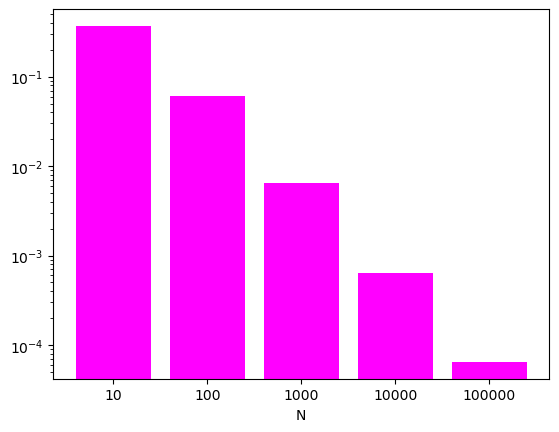

In [5]:
plt.bar(N_list, err_list, color='magenta')

plt.yscale('log')
plt.xlabel('N')

plt.savefig('plots/series_abs_error.png', dpi=300)
plt.show()

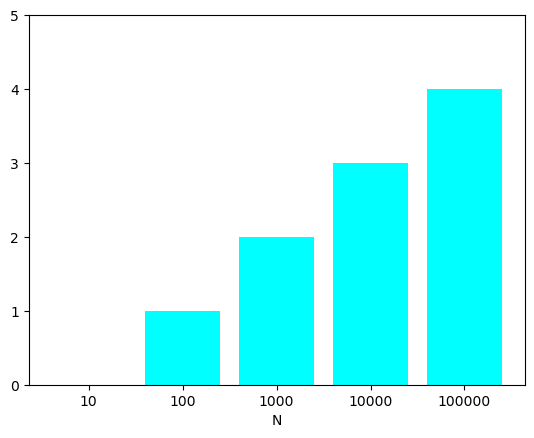

In [6]:
plt.bar(N_list, digits_list, color='cyan')

plt.xlabel('N')
plt.yticks([n for n in range(max(digits_list) + 2)])

plt.savefig('plots/series_num_digits.png', dpi=300)
plt.show()

### __Задача 1.3.3__
#### Формулировка задачи
Для заданной матрицы $A$ найти (если это возможно) обратную матрицу. Затем в элемент $a_{11}$ внести погрешность в 10% и снова найти обратную матрицу. Объяснить полученный результат.

In [7]:
A = np.array([[3, 5, 3],
              [9, 15, 9],
              [6, 7, 2]], dtype=float)

In [8]:
def det(mat):
    """
    Calculates determinant for 3x3 matrix
    """
    det = 0
    det += mat[0, 0] * mat[1, 1] * mat[2, 2] 
    det += mat[1, 0] * mat[2, 1] * mat[0, 2] 
    det += mat[0, 1] * mat[1, 2] * mat[2, 0]
    det -= mat[0, 2] * mat[1, 1] * mat[2, 0]
    det -= mat[0, 0] * mat[1, 2] * mat[2, 1] 
    det -= mat[0, 1] * mat[1, 0] * mat[2, 2]
    return det 

In [9]:
det(A)

0.0

Определитель матрицы $A$ равен 0. Следовательно, у этой матрицы не существует обратной.

Добавим погрешность в $a_{11}$ и попробуем найти обратную матрицу.

In [10]:
B = np.copy(A).astype(float)
C = np.copy(A).astype(float)

B[0, 0] = 1.1 * B[0, 0]
C[0, 0] = 0.9 * C[0, 0]

In [11]:
print(f"Det(B):{det(B)}")
print(f"Det(C):{det(C)}")

Det(B):-9.900000000000034
Det(C):9.900000000000006


In [12]:
print("Matrix inverse to B:")
print(np.linalg.inv(B))

Matrix inverse to B:
[[ 3.33333333e+00 -1.11111111e+00  1.17190208e-16]
 [-3.63636364e+00  1.15151515e+00  2.72727273e-01]
 [ 2.72727273e+00 -6.96969697e-01 -4.54545455e-01]]


In [13]:
print("Matrix inverse to C:")
print(np.linalg.inv(C))

Matrix inverse to C:
[[-3.33333333e+00  1.11111111e+00  1.17190208e-16]
 [ 3.63636364e+00 -1.27272727e+00  2.72727273e-01]
 [-2.72727273e+00  1.12121212e+00 -4.54545455e-01]]


### __Задача 1.6__
#### Формулировка задачи
Для языка Python найти значение машинного нуля, машинной бесконечности, машинного эпсилон.

In [14]:
a = 1
b = a
while a > 0:
    b = a
    a /= 2

print(f"Machine zero in Python is {b}")

Machine zero in Python is 5e-324


In [15]:
a = 1.0
b = a
while a != float('inf'):
    b = a
    a *= 2

print(f"Machine infinity in Python is {b}")

Machine infinity in Python is 8.98846567431158e+307


In [16]:
a = 1.0
eps = a
while a + 1 > 1:
    eps = a
    a /= 2

print(f"Machine epsilon in Python is {eps}")

Machine epsilon in Python is 2.220446049250313e-16


### __Задача 1.7__
#### Формулировка задачи
Вычислить значение машинного нуля, машинной бесконечности машинного эпсилон в режимах одинарной, двойной и расширенной точности на двух алгоритмических языках. Сравнить результаты между собой.

In [19]:
import warnings


def get_machine_zero(dtype):
    """
    Finds machine zero for data type
    """
    a = np.array([1.0], dtype=dtype)
    dtype_zero = np.copy(a)
    while (a > 0).all():
        dtype_zero = np.copy(a)
        a /= 2
    return dtype_zero[0]


def get_machine_inf(dtype):
    """
    Finds machine infinity for data type
    """
    warnings.filterwarnings("ignore")
    a = np.array([1.0], dtype=dtype)
    dtype_inf = np.copy(a)
    while not np.isinf(a).all():
        dtype_inf = np.copy(a)
        a *= 2
    warnings.filterwarnings("default")
    return dtype_inf[0]


def get_machine_eps(dtype):
    """
    Finds machine epsilon for data type
    """
    a = np.array([1.0], dtype=dtype)
    dtype_eps = np.copy(b)
    while (a + 1 > 1).all():
        dtype_eps = np.copy(a)
        a /= 2
    return dtype_eps[0]


def get_info(dtype):
    """
    Finds machine zero, infinity and epsilon.
    :rtype: tuple(float, float, float)
    """
    dtype_zero = get_machine_zero(dtype)
    dtype_inf = get_machine_inf(dtype)
    dtype_eps = get_machine_eps(dtype)
    return dtype_zero, dtype_inf, dtype_eps

In [35]:
zero_s, inf_s, eps_s = get_info(np.single)
zero_d, inf_d, eps_d = get_info(np.double)
zero_ld, inf_ld, eps_ld = get_info(np.longdouble)

In [36]:
print("-- Single precision mode --")
print(f"Zero: {zero_s}")
print(f"Infinity: {inf_s}")
print(f"Epsilon: {eps_s}", end='\n\n')

print("-- Double precision mode --")
print(f"Zero: {zero_d}")
print(f"Infinity: {inf_d}")
print(f"Epsilon: {eps_d}", end='\n\n')

print("-- Extended precision mode --")
print(f"Zero: {zero_ld}")
print(f"Infinity: {inf_ld}")
print(f"Epsilon: {eps_ld}")

-- Single precision mode --
Zero: 1.401298464324817e-45
Infinity: 1.7014118346046923e+38
Epsilon: 1.1920928955078125e-07

-- Double precision mode --
Zero: 5e-324
Infinity: 8.98846567431158e+307
Epsilon: 2.220446049250313e-16

-- Extended precision mode --
Zero: 5e-324
Infinity: 8.98846567431158e+307
Epsilon: 2.220446049250313e-16


### __Задача 1.9.4__
#### Формулировка задачи
Для матрицы $A$ решить вопрос существования обратной в следующих случаях:

1) элементы матрицы заданы точно;
2) элементы матрицы заданы приближённо с относительной погрешностью а)$\ \delta = \alpha \%$ б)$\ \delta = \beta \%$

Найти относительную погрешность.

$$
A = \begin{pmatrix}
    9    & 5   & 6  \\
    13.5 & 9.5 & 11 \\
    8    & 4   & 5
\end{pmatrix}
$$

$$
\alpha = 0.1 \\ \ \ \ \ \ \beta = 0.5
$$

In [106]:
mat_A = np.array([
    [9, 5, 6],
    [13.5, 9.5, 11],
    [8, 4, 5]
])

alpha = 0.1
beta = 0.5

delta1 = 0.01 * alpha
delta2 = 0.01 * beta

#### Случай точных значений

In [107]:
det(mat_A)

2.0

#### Случай приближённых значений

In [108]:
def int2mat(N: int):
    """
    Convert integer number N to 3 on 3 matrix with elements equal 1 or -1.
    """
    arr = np.zeros(9)
    for i in range(9):
        arr[i] = (N >> i) % 2
    arr = arr.reshape(3, 3)
    arr[arr == 0] = -1
    return arr


def find_min_and_max_det(mat: np.ndarray, delta: float):
    """
    Returns m and M for given 3 on 3 matrix and delta
    """
    m = +np.inf
    M = -np.inf
    for n in range(2 ** 9):
        current_mat = mat * (1 + delta * int2mat(n))
        determinant = det(current_mat)
        if determinant < m:
            m = determinant
        if determinant > M:
            M = determinant
    return m, M

In [114]:
m1, M1 = find_min_and_max_det(mat_A, delta1)
m2, M2 = find_min_and_max_det(mat_A, delta2)

eps1 = (M1 - m1) / (m1 + M1)
eps2 = (M2 - m2) / (m2 + M2)

In [117]:
print(f"-- delta={alpha}% --")
print(f"m={m1:.4f}")
print(f"M={M1:.4f}")
print(f"relative error: {eps1:.4f}")
print()

print(f"-- delta={beta}% --")
print(f"m={m2:.4f}")
print(f"M={M2:.4f}")
print(f"relative error: {eps2:.4f}")

-- delta=0.1% --
m=1.4695
M=2.5295
relative error: 0.2651

-- delta=0.5% --
m=-0.6632
M=4.6367
relative error: 1.3338
